### 【問題1】1次関数
$x$ が-50から50の範囲で次の式を考えます。

$$
y = \frac{1}{2}x + 1
$$

-50から50まで0.1間隔のxを表すndarrayと、各要素に対するyを表すndarrayを作成してください。

In [1]:
import numpy as np

In [2]:
import numpy as np

# 入力値（または配列）を計算式に入れて答えを出力する関数
def calculation(x):
    y = x/2 + 1
    return y

# -50から50まで0.1間隔のxを表すndarrayの作成
x = np.arange(-50, 50.1, 0.1)

# 各要素に対するyを表すndarray
y = calculation(x)

# 解答
print("xを表すndarray 「x」 を作成しました。形状は： {}".format(x.shape))
print("計算結果を入れたndarray 「y」 を作成しました。形状は：　{}".format(y.shape))

xを表すndarray 「x」 を作成しました。形状は： (1001,)
計算結果を入れたndarray 「y」 を作成しました。形状は：　(1001,)


### 【問題2】配列の結合
問題1で作成したndarrayを結合し、(1001, 2)の形の配列にしてください。0列目にx、1列目にyが来るようにします。

In [16]:
# concatenateを用いて２つのリストを列方向に結合する
# concatenateは次元がないと使用できないので、xとyそれぞれをreshapeを使用して
# ２次元配列に変形。
# xy = np.concatenate((x.reshape(len(x),1), y.reshape(len(y),1)), axis=1)

# 「shape に (1, -1) や (-1, 1) を指定すると，2次元の横ベクトルや縦ベクトルを作成可能
xy = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)


# 解答
print("リスト x と　リスト　y　を結合しました。:\n{}".format(xy))
print("xyの形状は：　{}".format(xy.shape))

リスト x と　リスト　y　を結合しました。:
[[-50.   -24.  ]
 [-49.9  -23.95]
 [-49.8  -23.9 ]
 ...
 [ 49.8   25.9 ]
 [ 49.9   25.95]
 [ 50.    26.  ]]
xyの形状は：　(1001, 2)


### 【問題3】勾配を求める

各x座標における勾配を求めます。ここで勾配はyの変化量をxの変化量で割ることで計算します。

[![Image from Gyazo](https://t.gyazo.com/teams/diveintocode/7fd04c4808b8a0150a49c908e21f3cd2.png)](https://diveintocode.gyazo.com/7fd04c4808b8a0150a49c908e21f3cd2)

各変化量は以下の図のように隣同士の要素の差から近似的に求めます。

[![Image from Gyazo](https://t.gyazo.com/teams/diveintocode/398d8c5b4b1bd4151dea6488059226a1.png)](https://diveintocode.gyazo.com/398d8c5b4b1bd4151dea6488059226a1)

**注意**

- 厳密に各点における勾配を求めるには極限（微分）を利用する必要があります
- 勾配はx座標の間隔を使うので、xの要素数に対して一つ少なくなります

In [17]:
# 勾配を計算する関数（yの変化量÷xの変化量）
def gradient(xy):
    """
    勾配を計算する関数。
    引数に入れられた配列xyのyの変化量（１列目の次項目との差）を
    xの変化量（０列目の次項目との差）で割ることにより計算

    Parameters
    ----------------
    xy : ndarray
      勾配を求めたい配列（０列：x、１列：y）

    Returns
    ----------------
    gradient : ndarray
      関数の勾配。差をとるため要素は1つ減る
    """
    # yの変化量
    change_y = xy[1:,1] - xy[:-1,1]
    # xの変化量
    change_x = xy[1:,0] - xy[:-1,0]
    
    # 勾配を計算
    gradient = change_y/change_x
    
    return gradient
    
# gradient関数を使って勾配を計算
gradient_xy = gradient(xy)

# 解答
print("勾配を計算しました。:\n{}".format(gradient_xy))
print("勾配を入れた配列gradient_xyの形状は：　{}".format(gradient_xy.shape))

勾配を計算しました。:
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.

### 【問題4】グラフを描く
1次関数のグラフをMatplotlibを用いて描いてください。また、それとは別に横軸をx、縦軸を勾配としたグラフも描いてください。

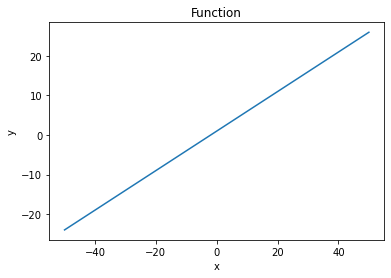

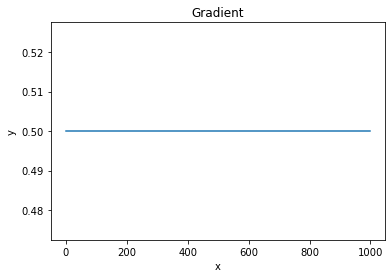

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# 線グラフで関数を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function")
plt.plot(xy[:,0], xy[:,1])
plt.show()

# 勾配グラフのx軸用数列を作成（xやyより１つ少ない）
gradient_x = np.arange(len(gradient_xy))

# 線グラフで勾配を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient")
plt.plot(gradient_x, gradient_xy)
plt.show()


### 【問題5】Pythonの関数化

問題1から問題3までの範囲をまとめて行うPythonの関数を雛形を参考に作成してください。


そして、以下の3式の勾配を0.1間隔で求めてndarrayで出力してください。

$$
y = x^{2} \quad (-50\leq x \leq 50)\\
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$

また、問題4と同様にグラフを描いてください。

**《雛形》**

ndarrayに対して三角関数のsinの計算を行うには np.sin()を用います。

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    勾配を計算する。

    Parameters
    ----------------
    function : function
    求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
    np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
    xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n,)
    関数の勾配
    """

In [20]:
import numpy

def compute_gradient(function, x_range=(-50, 50.1, 0.1)):
    """
    変化量を使い勾配を計算する。

    Parameters
    ----------------
    function : function
      求めたい関数、xのndarrayを入れるとyのndarrayを返すもの。
    x_range : tuple
      np.arange()の引数と同じ方法で範囲を指定する。

    Returns
    ----------------
    array_xy : ndarray, shape(n, 2)
      xとyを結合したもの。nはx_rangeに依存する。
    gradient : ndarray, shape(n-1,)
      関数の勾配。差をとるため要素は1つ減る
    """
    # arangeはスカラー値を引数に取るためそれぞれ入力
    x = np.arange(x_range[0], x_range[1], x_range[2])
    # 計算
    y = function(x)
    
    # concatenateを用いて２つのリストを列方向に結合する
    # x　と y は(-1, 1)で2次元の縦ベクトルに変換
    array_xy = np.concatenate((x.reshape(-1,1), y.reshape(-1,1)), axis=1)
    
    # yの変化量
    change_y = array_xy[1:,1] - array_xy[:-1,1]
    # xの変化量
    change_x = array_xy[1:,0] - array_xy[:-1,0]
    
    # 勾配を計算（yの変化量÷xの変化量）
    gradient = change_y/change_x
    
    return array_xy, gradient


"""
各計算式の関数を用意
"""
def function1(array_x):
    array_y = array_x/2 + 1
    return array_y

def function2(array_x):
    # 𝑦=𝑥^2(−50≤𝑥≤50)
    array_y = array_x**2
    return array_y

def function3(array_x):
    # 𝑦=2𝑥^2+2^𝑥(−50≤𝑥≤50)
    array_y = 2*array_x**2 + 2**array_x
    return array_y

def function4(array_x):
    # 𝑦=𝑠𝑖𝑛(𝑥^1/2)(0≤𝑥≤50)
    # array_y = np.sin(array_x**(1/2))
    array_y = np.sin(numpy.sqrt(array_x))
    return array_y


# 作成した関数を用いて 計算結果　と 勾配 の配列を出力
array_xy1, gradient1 = compute_gradient(function1)
array_xy2, gradient2 = compute_gradient(function2)
array_xy3, gradient3 = compute_gradient(function3)
# sin関数にマイナス値を入れると計算結果が　nan　となり警告が出るため整数値のみ計算
array_xy4, gradient4 = compute_gradient(function4, x_range=(0, 50.1, 0.1))


# 解答
print("計算式２の勾配は:\n{}".format(gradient2))
print("計算式3の勾配は:\n{}".format(gradient3))
print("計算式4の勾配は:\n{}".format(gradient4))

計算式２の勾配は:
[-99.9 -99.7 -99.5 -99.3 -99.1 -98.9 -98.7 -98.5 -98.3 -98.1 -97.9 -97.7
 -97.5 -97.3 -97.1 -96.9 -96.7 -96.5 -96.3 -96.1 -95.9 -95.7 -95.5 -95.3
 -95.1 -94.9 -94.7 -94.5 -94.3 -94.1 -93.9 -93.7 -93.5 -93.3 -93.1 -92.9
 -92.7 -92.5 -92.3 -92.1 -91.9 -91.7 -91.5 -91.3 -91.1 -90.9 -90.7 -90.5
 -90.3 -90.1 -89.9 -89.7 -89.5 -89.3 -89.1 -88.9 -88.7 -88.5 -88.3 -88.1
 -87.9 -87.7 -87.5 -87.3 -87.1 -86.9 -86.7 -86.5 -86.3 -86.1 -85.9 -85.7
 -85.5 -85.3 -85.1 -84.9 -84.7 -84.5 -84.3 -84.1 -83.9 -83.7 -83.5 -83.3
 -83.1 -82.9 -82.7 -82.5 -82.3 -82.1 -81.9 -81.7 -81.5 -81.3 -81.1 -80.9
 -80.7 -80.5 -80.3 -80.1 -79.9 -79.7 -79.5 -79.3 -79.1 -78.9 -78.7 -78.5
 -78.3 -78.1 -77.9 -77.7 -77.5 -77.3 -77.1 -76.9 -76.7 -76.5 -76.3 -76.1
 -75.9 -75.7 -75.5 -75.3 -75.1 -74.9 -74.7 -74.5 -74.3 -74.1 -73.9 -73.7
 -73.5 -73.3 -73.1 -72.9 -72.7 -72.5 -72.3 -72.1 -71.9 -71.7 -71.5 -71.3
 -71.1 -70.9 -70.7 -70.5 -70.3 -70.1 -69.9 -69.7 -69.5 -69.3 -69.1 -68.9
 -68.7 -68.5 -68.3 -68.1 -67.9 -67.7 -67.

**ここから本題**

- $$
y = x^{2} \quad (-50\leq x \leq 50)
$$

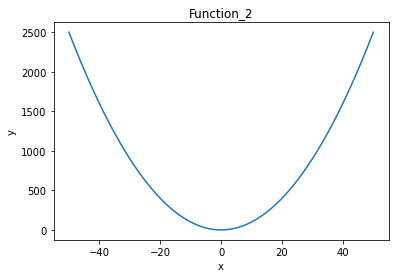

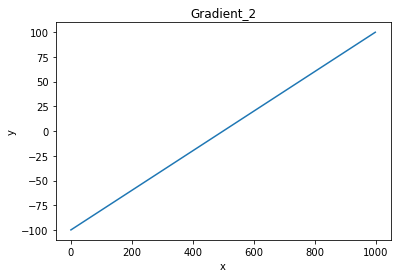

In [21]:

# 線グラフで関数を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function_2")
plt.plot(array_xy2[:,0], array_xy2[:,1])
plt.show()

# 勾配グラフのx軸用数列を作成（xやyより１つ少ない）
gradient_x = np.arange(len(gradient2))

# 線グラフで勾配を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient_2")
plt.plot(gradient_x, gradient2)
plt.show()


- $$
y = 2x^{2}+2^{x} \quad (-50\leq x \leq 50)\\
$$

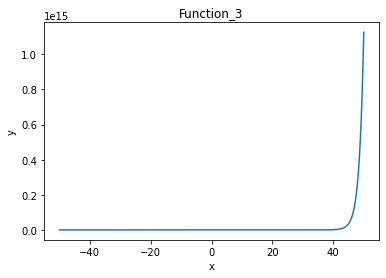

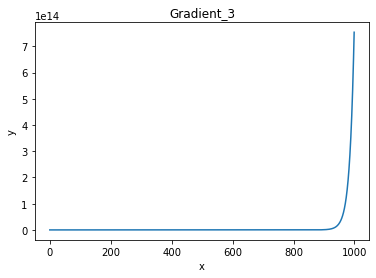

In [23]:

# 線グラフで関数を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function_3")
plt.plot(array_xy3[:,0], array_xy3[:,1])
plt.show()

# 勾配グラフのx軸用数列を作成（xやyより１つ少ない）
gradient_x = np.arange(len(gradient3))

# 線グラフで勾配を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient_3")
plt.plot(gradient_x, gradient3)
plt.show()


- $$
y = sin(x^{\frac{1}{2}}) \quad (0\leq x \leq 50)
$$

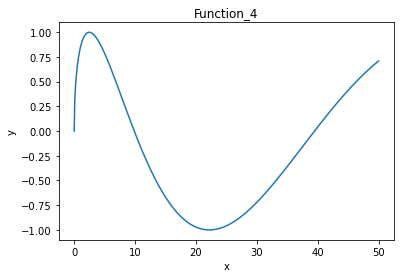

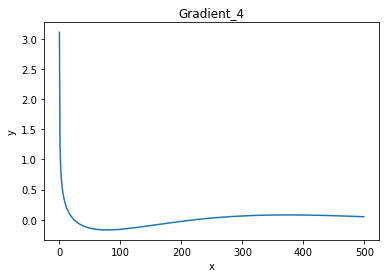

In [24]:
# 線グラフで関数を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function_4")
plt.plot(array_xy4[:,0], array_xy4[:,1])
plt.show()

# 勾配グラフのx軸用数列を作成（xやyより１つ少ない）
gradient_x = np.arange(len(gradient4))

# 線グラフで勾配を可視化する
plt.xlabel("x")
plt.ylabel("y")
plt.title("Gradient_4")
plt.plot(gradient_x, gradient4)
plt.show()


### 【問題6】最小値を求める
問題5で扱った関数のyの最小値を求めます。xの範囲も問題5と同様とします。


今回は勾配降下法ではなく、ndarrayのminメソッド、argminメソッドを用いてください。minメソッドは最小値を、argminメソッドは最小値のインデックスを取得することができます。


また、最小のyをとる前後の勾配を表示してください。

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.min.html

https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.argmin.html

In [25]:
def min_print(function_name, array_xy_min, gradient_min):
    """
    最小値とその前後の勾配をコメントアウトする関数
    
    Parameters
    ----------------
    function_name : string
      計算式の名前を入力

    array_xy_min : ndarray
      勾配を求めたい配列（０列：x、１列：y）
      
    gradient_min : ndarray
      勾配を求めたい配列（０列：x、１列：y）
      
    Returns
    ----------------
    none
    """
    # 最小値の取得
    y_min = array_xy_min.min(axis=0)[1]
    print("{}の最小値は {} です。".format(function_name, y_min))
    
    # 最小値のインデックスを取得
    y_argmin = array_xy_min.argmin(axis=0)[1]

    # 一つ前の勾配を求めて変数に入れる
    # 最小値のインデックスが　０ のとき、それより前の勾配は表示できないため回避
    if y_argmin <= 0:
        before_gradient = '計算不能'
    else:
        before_gradient = gradient_min[y_argmin - 1]
        
    # 一つ後の勾配を求めて変数に入れる
    # 最小値のインデックスが　最大値 のとき、それより後の勾配は表示できないため回避
    if y_argmin >= len(array_xy_min[:,1] - 1):
        after_gradient = '計算不能'
    else:
        after_gradient = gradient_min[y_argmin]
        
    print("その前の勾配は {} です。".format(before_gradient))
    print("その後の勾配は {} です。".format(after_gradient))
    print()

#　最小値をプリントする関数に 数式の結果と勾配を入力
min_print('function1', array_xy1, gradient1) 
min_print('function2', array_xy2, gradient2) 
min_print('function3', array_xy3, gradient3)       
min_print('function4', array_xy4, gradient4)

function1の最小値は -24.0 です。
その前の勾配は 計算不能 です。
その後の勾配は 0.5 です。

function2の最小値は 5.048709793414476e-25 です。
その前の勾配は -0.09999999999858034 です。
その後の勾配は 0.1000000000014225 です。

function3の最小値は 0.9505505632959851 です。
その前の勾配は -0.4170183305979998 です。
その後の勾配は 0.024824282409972788 です。

function4の最小値は -0.9999997540298113 です。
その前の勾配は -0.0006388422559544435 です。
その後の勾配は 0.0004874477930660974 です。

